This data preprocessing is for the Bank_Transaction_Fraud_Detection-old.csv file.  
The old dataset contains 23 columns and 200,000 rows.  
The dataset background is in India, with only indian currency and indian cities and states.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 




#### Data overview 

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/Administrator/Downloads/Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [4]:
df.isnull().sum()


Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [5]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday  

C:\Windows\Temp\ipykernel_17076\4207532211.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


As part of the exploratory data analysis (EDA), I further processed the Transaction_Date column by converting it into a datetime format. This allowed me to extract key date components—year, month, and day—and store them in separate columns to enhance data processing and analysis.

Additionally, I extracted the weekday from the transaction date and created a new column, Transaction_Weekday, which represents the day of the week as follows:

0 = Monday
1 = Tuesday
2 = Wednesday
3 = Thursday
4 = Friday
5 = Saturday
6 = Sunday


In [6]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Category'] = df['Transaction_Time'].apply(categorize_time)

C:\Windows\Temp\ipykernel_17076\3243298511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


This code snippet processes the 'Transaction_Time' column in a DataFrame (df) by categorising each transaction based on the time of day.

First, it converts the 'Transaction_Time' column into a datetime format, ensuring that time-based operations can be performed effectively. Then, a function is defined to extract the hour component from the transaction time and classify it into one of the following categories:

Morning (5 AM – 11:59 AM)
Afternoon (12 PM – 4:59 PM)
Evening (5 PM – 8:59 PM)
Night (9 PM – 4:59 AM)

Finally, the categorize_time function is applied to every entry in the 'Transaction_Time' column, creating a new column, 'Time_Category', that stores the corresponding time category for each transaction.









In [7]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,2025-01-23,...,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,2025,1,23,3,Afternoon
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,2025-01-11,...,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,2025,1,11,5,Evening
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,2025-01-25,...,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com,2025,1,25,5,Night
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,2025-01-19,...,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com,2025,1,19,6,Afternoon
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,2025-01-30,...,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com,2025,1,30,3,Evening


#### Drop column

In [8]:
df = df.drop_duplicates()


In [9]:
df_new = df.drop(columns=['Customer_ID', 'Customer_Name', 
                          'Transaction_ID', 'Merchant_ID',
                          'Transaction_Date','Transaction_Time', 
                          'Transaction_Year', 'Transaction_Month',
                          'Transaction_Currency',
                          'Customer_Contact', 'Customer_Email'])

df_new.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,23,3,Afternoon
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,11,5,Evening
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,25,5,Night
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,19,6,Afternoon
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,30,3,Evening


The following columns—'Customer_ID', 'Customer_Name', 'Transaction_ID', 'Merchant_ID', 'Customer_Contact', and 'Customer_Email'—contain unique identifiers that do not contribute to our analysis and can be excluded.

Similarly, 'Transaction_Date' and 'Transaction_Time' are no longer needed, as their formats have already been transformed, and new relevant columns have been created.

Additionally, 'Transaction_Year', 'Transaction_Month', and 'Transaction_Currency' provide no meaningful variance in this dataset. The entire dataset pertains to the year 2025, all transactions occur in January, and the transaction currency is consistently INR. Therefore, these columns do not add value to the analysis and can be removed.

In [11]:
df_new.to_csv('new_dataset.csv', index=False) 


In [12]:
print(df_new['Is_Fraud'].value_counts(normalize=True))

Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64


In [13]:
import os
print("path：", os.getcwd())


path： c:\Users\Administrator\Downloads\0228-Enterprise AI-Group Project


In [14]:
df_new = pd.read_csv("C:/Users/Administrator/Downloads/0228-Enterprise AI-Group Project/new_dataset.csv")

#### Create a Test Set

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=0.2, stratify=df_new['Is_Fraud'], random_state=42)


print("Train Set Class Distribution:\n", train_set['Is_Fraud'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['Is_Fraud'].value_counts(normalize=True))


Train Set Class Distribution:
 Is_Fraud
0    0.949562
1    0.050438
Name: proportion, dtype: float64
Test Set Class Distribution:
 Is_Fraud
0    0.94955
1    0.05045
Name: proportion, dtype: float64


In this section, I performed data splitting to divide the dataset into training and testing sets while ensuring that the class distribution of the target variable ('Is_Fraud') remains consistent across both subsets.

Using scikit-learn’s train_test_split function, I split the dataset into:
80% training data (train_set)
20% testing data (test_set)

To prevent class imbalance from affecting the model's performance, I applied stratified sampling (stratify=df_new['Is_Fraud']). This ensures that the proportion of fraudulent (Is_Fraud = 1) and non-fraudulent (Is_Fraud = 0) transactions remains nearly identical in both sets.

After splitting, I verified the class distribution using the .value_counts(normalize=True) function. The output confirms that:

In the training set, 94.96% of transactions are non-fraudulent, while 5.04% are fraudulent.
In the test set, 94.95% of transactions are non-fraudulent, while 5.05% are fraudulent.
These proportions are nearly identical, indicating that the stratified sampling successfully preserved the distribution of the target variable.

#### Categorical into Numerical 

In [16]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold


categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()

 
dummy_encode_cols = []  
label_encode_cols = []  
freq_encode_cols = []  
target_encode_cols = []

for col in categorical_cols:
    num_unique = train_set[col].nunique()

    if num_unique < 5:
        dummy_encode_cols.append(col)  # One-Hot Encoding
    elif num_unique <= 20:
        label_encode_cols.append(col)  # Label Encoding
    elif num_unique <= 50:
        freq_encode_cols.append(col)  # Frequency Encoding
    else:
        target_encode_cols.append(col)  # Target Encoding

print("Dummy Encoding:", dummy_encode_cols)
print("Label Encoding:", label_encode_cols)
print("Frequency Encoding:", freq_encode_cols)
print("Target Encoding:", target_encode_cols)



Dummy Encoding: ['Gender', 'Account_Type', 'Device_Type', 'Time_Category']
Label Encoding: ['Transaction_Type', 'Merchant_Category', 'Transaction_Device']
Frequency Encoding: ['State']
Target Encoding: ['City', 'Bank_Branch', 'Transaction_Location', 'Transaction_Description']


In this section, I applied categorical feature encoding to convert categorical variables into numerical representations suitable for machine learning models. Since categorical variables have varying levels of cardinality (i.e., the number of unique values), I used different encoding techniques based on the number of unique categories in each feature.

1. Extracted all categorical features from the training dataset.

2. Assigning Encoding Methods Based on Cardinality

One-Hot Encoding (Dummy Encoding): Applied to 'Gender', 'Account_Type', 'Device_Type', 'Time_Category' columns with fewer than 5 unique values, as it efficiently represents small categorical sets.

Use Label Encoding for 'Transaction_Type', 'Merchant_Category', 'Transaction_Device' columns with 5 to 20 unique values, replacing categorical values with numerical labels.

Use Frequency Encoding for 'State'columns with 21 to 50 unique values, where each category is replaced by its frequency in the dataset.

Use Target Encoding to 'City', 'Bank_Branch', 'Transaction_Location', 'Transaction_Description' columns with more than 50 unique values, encoding categories based on their relationship with the target variable (e.g., fraud likelihood).






In [17]:
# 1. Dummy Encoding
train_set = pd.get_dummies(train_set, columns=dummy_encode_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=dummy_encode_cols, drop_first=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(0, inplace=True)

# 2. Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])  
    test_set[col] = test_set[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  
    label_encoders[col] = le  

# 3. Frequency Encoding
for col in freq_encode_cols:
    freq_map = train_set[col].value_counts(normalize=True).to_dict()
    train_set[col] = train_set[col].map(freq_map)
    test_set[col] = test_set[col].map(freq_map).fillna(train_set[col].mean())

# 4. K-Fold Target Encoding
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in target_encode_cols:
    train_set[col + '_target_enc'] = 0  # 初始化列
    for train_idx, val_idx in kf.split(train_set):
        train_fold = train_set.iloc[train_idx].copy()
        val_fold = train_set.iloc[val_idx].copy()

        mean_target = train_fold.groupby(col)['Is_Fraud'].mean()
        train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())

    test_set[col + '_target_enc'] = test_set[col].map(train_set.groupby(col)['Is_Fraud'].mean()).fillna(train_set['Is_Fraud'].mean())

train_set.drop(columns=target_encode_cols, inplace=True)
test_set.drop(columns=target_encode_cols, inplace=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(train_set.mean(), inplace=True)

print(f'Processed train set shape: {train_set.shape}')
print(f'Processed test set shape: {test_set.shape}')

C:\Windows\Temp\ipykernel_17076\2060840290.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.06016043 0.04653568 0.03747323 ... 0.05487805 0.03196931 0.04057018]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())
C:\Windows\Temp\ipykernel_17076\2060840290.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.06016043 0.04653568 0.03747323 ... 0.05487805 0.03196931 0.04057018]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].me

Processed train set shape: (160000, 23)
Processed test set shape: (40000, 23)


#### Feature Importance

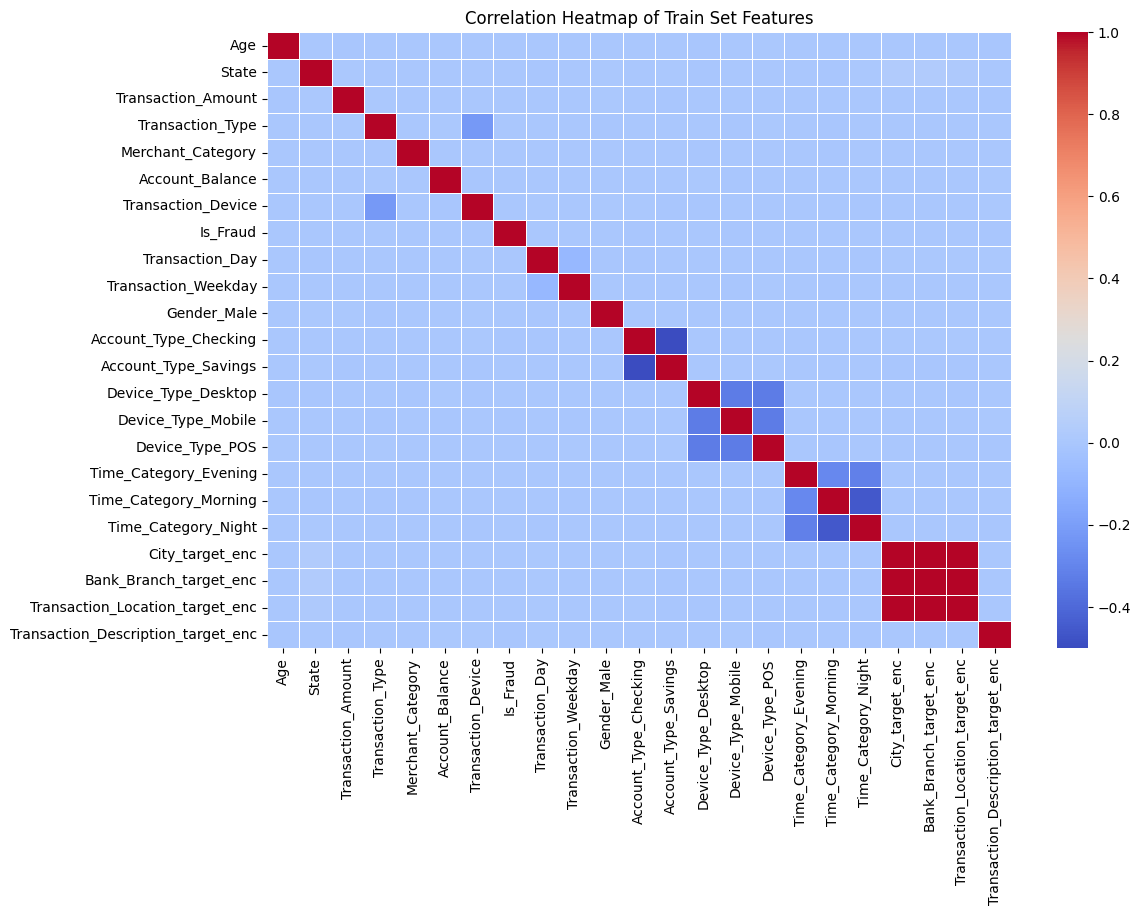

In [18]:
#import seaborn as sns
#import matplotlib.pyplot as plt


correlation_matrix = train_set.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Train Set Features")
plt.show()


In [19]:
fraud_correlation = train_set.corr()['Is_Fraud'].sort_values(ascending=False)
print(fraud_correlation)


Is_Fraud                              1.000000
Time_Category_Night                   0.003447
Gender_Male                           0.002420
City_target_enc                       0.002324
Bank_Branch_target_enc                0.002324
Transaction_Location_target_enc       0.001954
Device_Type_POS                       0.001918
Transaction_Device                    0.001849
Transaction_Day                       0.001406
Device_Type_Desktop                   0.000903
Transaction_Type                      0.000740
State                                 0.000684
Time_Category_Morning                 0.000241
Account_Balance                      -0.000453
Account_Type_Savings                 -0.000516
Transaction_Amount                   -0.000710
Time_Category_Evening                -0.000835
Age                                  -0.000930
Merchant_Category                    -0.001636
Transaction_Weekday                  -0.002329
Device_Type_Mobile                   -0.002715
Account_Type_

Correlation Heatmap: 

I computed the correlation matrix of the training dataset to identify relationships between different features.

A heatmap was generated to visualize the correlations, where:
Red indicates a strong positive correlation (closer to +1).
Blue indicates a strong negative correlation (closer to -1).
Most features exhibit weak or no correlation with others, except for some encoded categorical variables.


I also calculated the correlation of each feature with the target variable (Is_Fraud), while no single feature shows a strong correlation with fraud, suggesting that fraud detection is complex and requires combining multiple features.

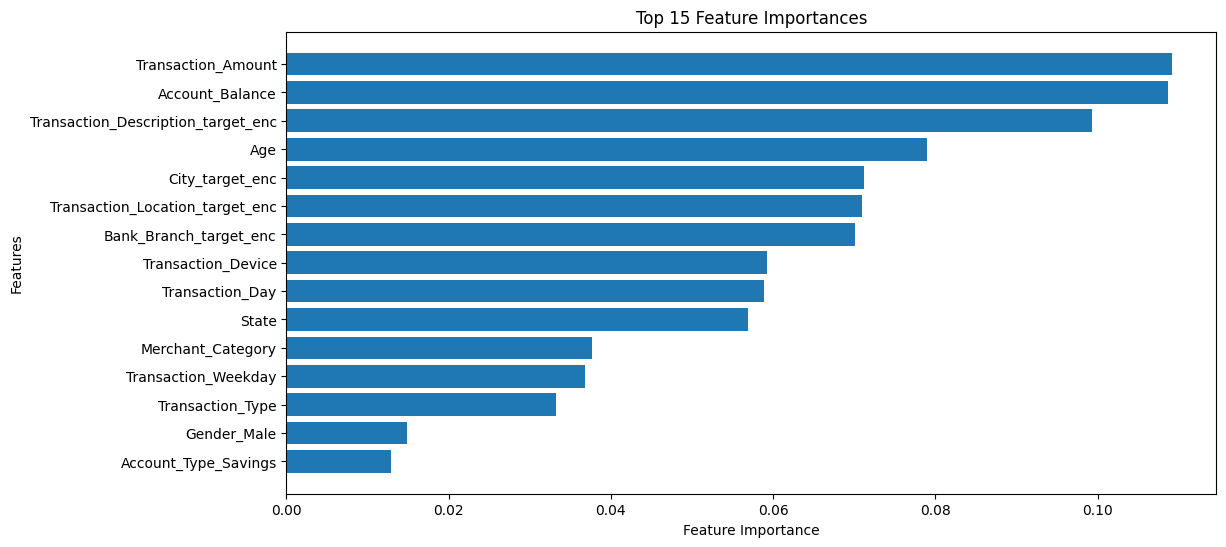

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

X_train = train_set.drop(columns=['Is_Fraud'])
y_train = train_set['Is_Fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [21]:
threshold = 0.005
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].tolist()
X_train_selected = X_train[selected_features]


Random Forest:

I trained a Random Forest Classifier to identify the most important features for fraud detection and used bar chart to show the top 15 most important features. 

A threshold of 0.005 was set to filter out less important features.  
X_train_selected contains only features with importance scores greater than 0.005, ensuring that only the most relevant variables contribute to the model.

d:\anaconda3\envs\causal_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


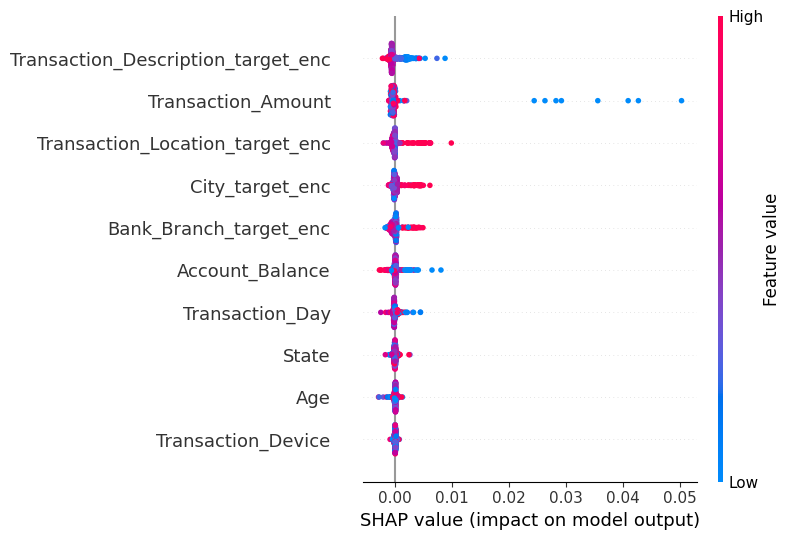

In [22]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier


top_features = feature_importances['Feature'][:10].tolist()  
X_train_selected = X_train[top_features]  

rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_selected, y_train) 


sample_size = 500
X_sample = X_train_selected.sample(sample_size, random_state=42)

explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values[:, :, 1], X_sample)  




SHAP Analysis for Feature Impact on Fraud Detection: 

In this section, I used SHAP (SHapley Additive exPlanations) to interpret the feature contributions of my Random Forest model in predicting fraud. SHAP values help explain how each feature influences the model’s predictions, providing insights into which variables are most impactful.

I selected the top 10 most important features from the previously computed feature importances.Also created a subset of the training data (X_train_selected) using only these selected features.

I trained a Random Forest model with 50 trees (n_estimators=50) and a depth limit of 5 (max_depth=5) to control complexity. The model was fitted using the selected features to focus on the most impactful variables.

To enhance efficiency, a random sample of 500 data points was selected instead of computing SHAP values on the entire dataset.


SHAP plot:

The plot shows how each feature contributes to the model's fraud prediction.  
The x-axis represents the SHAP values, indicating the magnitude of impact on the model’s decision.

'Transaction_Description_target_enc' has the highest impact, suggesting that certain descriptions correlate with fraudulent transactions.  
'Transaction_Amount' is another key factor, indicating that higher or unusual amounts may be linked to fraud.  
'Transaction_Location_target_enc', 'City_target_enc', and 'Bank_Branch_target_enc' also play a role, implying that fraud might be location-dependent.  
'Account_Balance', 'Transaction_Day', and 'Age' have smaller but still noticeable effects on predictions.

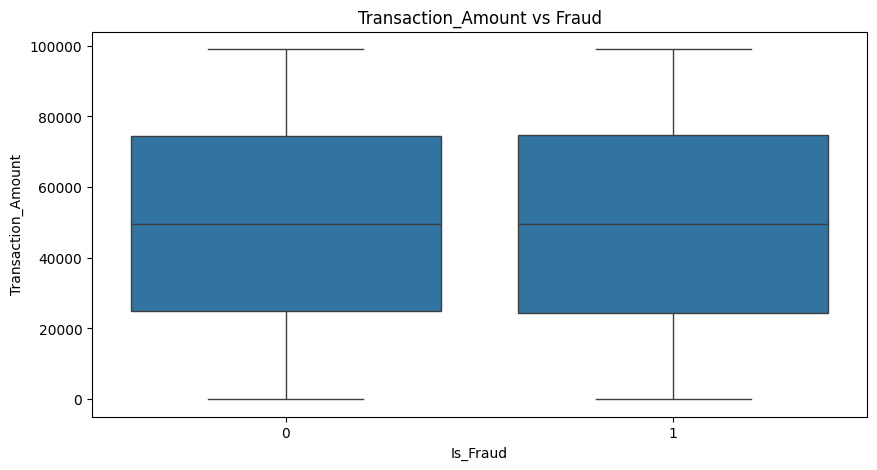

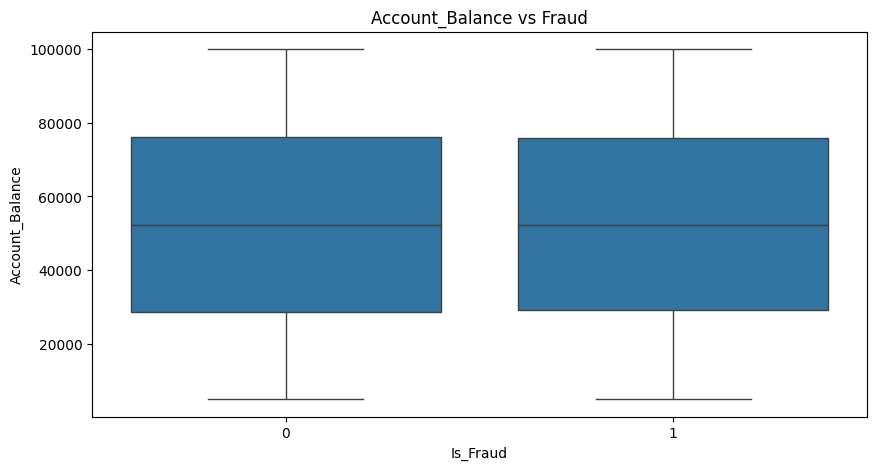

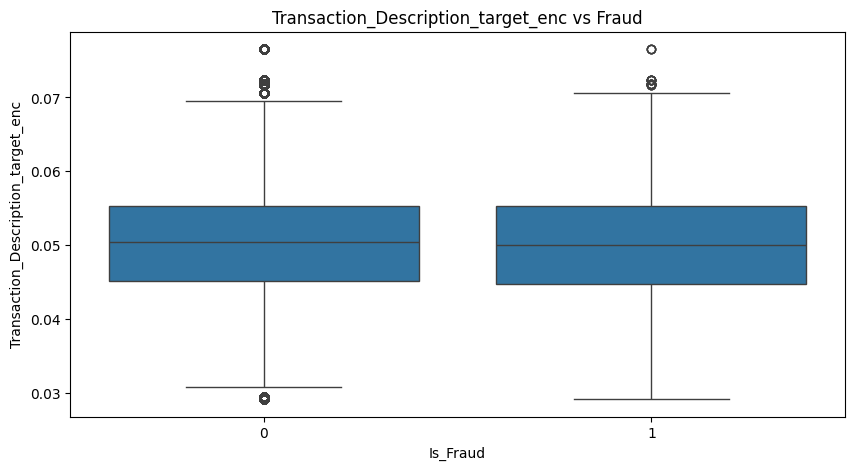

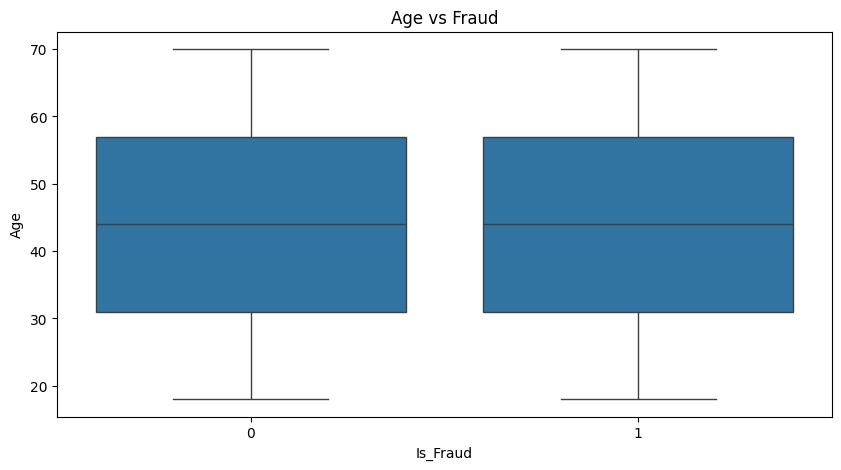

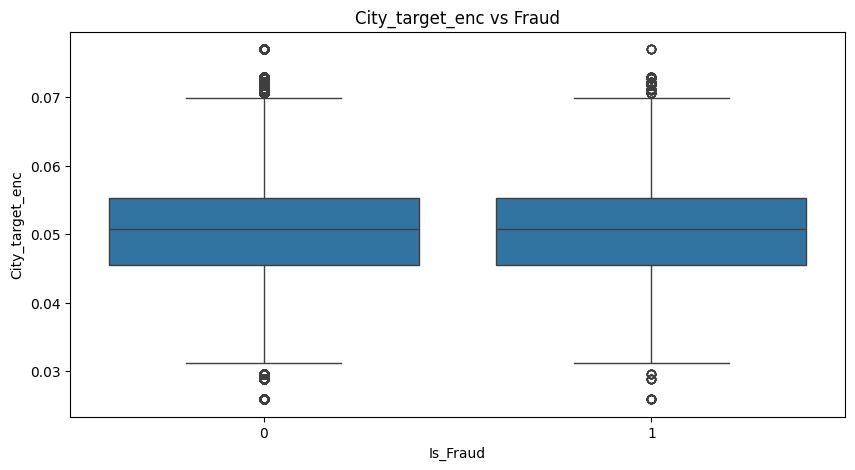

Is_Fraud                              1.000000
City_target_enc                       0.002324
Account_Balance                      -0.000453
Transaction_Amount                   -0.000710
Age                                  -0.000930
Transaction_Description_target_enc   -0.006727
Name: Is_Fraud, dtype: float64


In [23]:

top_features = feature_importances['Feature'][:5].tolist()  


for feature in top_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train_set['Is_Fraud'], y=train_set[feature])
    plt.title(f"{feature} vs Fraud")
    plt.show()

correlation = train_set[top_features + ['Is_Fraud']].corr()
print(correlation['Is_Fraud'].sort_values(ascending=False))



In [24]:

X_train = train_set.drop(columns=['Is_Fraud', 'Transaction_Amount', 'Account_Balance'])
y_train = train_set['Is_Fraud']

X_test = test_set.drop(columns=['Is_Fraud', 'Transaction_Amount', 'Account_Balance'])
y_test = test_set['Is_Fraud']


Based on the feature importance, I chose to drop 'Transaction_Amount', 'Account_Balance'. 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
print("Original columns in train_set:", train_set.columns)
print("Columns after dropping in X_train:", X_train.columns)


Original columns in train_set: Index(['Age', 'State', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Is_Fraud', 'Transaction_Day', 'Transaction_Weekday', 'Gender_Male',
       'Account_Type_Checking', 'Account_Type_Savings', 'Device_Type_Desktop',
       'Device_Type_Mobile', 'Device_Type_POS', 'Time_Category_Evening',
       'Time_Category_Morning', 'Time_Category_Night', 'City_target_enc',
       'Bank_Branch_target_enc', 'Transaction_Location_target_enc',
       'Transaction_Description_target_enc'],
      dtype='object')
Columns after dropping in X_train: Index(['Age', 'State', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Day', 'Transaction_Weekday',
       'Gender_Male', 'Account_Type_Checking', 'Account_Type_Savings',
       'Device_Type_Desktop', 'Device_Type_Mobile', 'Device_Type_POS',
       'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night',
     

In [27]:
print("Remaining columns in X_train:", X_train.columns)
print("Remaining columns in X_test:", X_test.columns)


Remaining columns in X_train: Index(['Age', 'State', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Day', 'Transaction_Weekday',
       'Gender_Male', 'Account_Type_Checking', 'Account_Type_Savings',
       'Device_Type_Desktop', 'Device_Type_Mobile', 'Device_Type_POS',
       'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night',
       'City_target_enc', 'Bank_Branch_target_enc',
       'Transaction_Location_target_enc',
       'Transaction_Description_target_enc'],
      dtype='object')
Remaining columns in X_test: Index(['Age', 'State', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Day', 'Transaction_Weekday',
       'Gender_Male', 'Account_Type_Checking', 'Account_Type_Savings',
       'Device_Type_Desktop', 'Device_Type_Mobile', 'Device_Type_POS',
       'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night',
       'City_target_enc', 'Bank_Branch_target_enc',
       'Trans

In [29]:
print(train_set.select_dtypes(include=['object']).columns)
print(test_set.select_dtypes(include=['object']).columns)


Index([], dtype='object')
Index([], dtype='object')


In [30]:
train_set.to_csv("processed_train_set.csv", index=False)
test_set.to_csv("processed_test_set.csv", index=False)

